In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [12]:
data_dir = os.path.join(os.path.dirname(os.path.abspath('.')), 'data')
train_dir = os.path.join(data_dir, 'training-cat-or-dogs')
validation_dir = os.path.join(data_dir, 'validation-cat-or-dogs')

train_dir_dogs = os.path.join(train_dir, 'dogs')
train_dir_cats = os.path.join(train_dir, 'cats')

validation_dir_dogs = os.path.join(validation_dir, 'dogs')
validation_dir_cats = os.path.join(validation_dir, 'cats')

print(train_dir_dogs)
print(train_dir_cats)

print(validation_dir_dogs)
print(validation_dir_cats)

print('Total training cat images: ', len(os.listdir(train_dir_cats)))
print('Total training dog images: ', len(os.listdir(train_dir_dogs)))

print('Total validation cat images: ', len(os.listdir(validation_dir_cats)))
print('Total validation dog images: ', len(os.listdir(validation_dir_dogs)))

D:\CProgrammingLanguage\tf-specialization\course2\data\training-cat-or-dogs\dogs
D:\CProgrammingLanguage\tf-specialization\course2\data\training-cat-or-dogs\cats
D:\CProgrammingLanguage\tf-specialization\course2\data\validation-cat-or-dogs\dogs
D:\CProgrammingLanguage\tf-specialization\course2\data\validation-cat-or-dogs\cats
Total training cat images:  1000
Total training dog images:  1000
Total validation cat images:  500
Total validation dog images:  500


In [14]:
# Building the model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 16, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 512, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [85]:

last_layer = model.get_layer('conv2d_5')
x = last_layer.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units = 10)(x)

new_model = tf.keras.Model(inputs = model.input, outputs = x)
new_model.summary()



Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3_input (InputLayer)  [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten_16 (Flatten)         (None, 73984)             0  

In [80]:
last_layer_output

<tf.Tensor 'conv2d_5/Identity:0' shape=(None, 34, 34, 64) dtype=float32>

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer = RMSprop(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

Data Preparation

In [18]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
history = model.fit(
    x = train_generator, 
    epochs = 15,
    validation_data = validation_generator,
    verbose = 2
)

Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 - 23s - loss: 0.7227 - accuracy: 0.5750 - val_loss: 0.6413 - val_accuracy: 0.6210
Epoch 2/15
100/100 - 22s - loss: 0.6008 - accuracy: 0.6820 - val_loss: 0.9184 - val_accuracy: 0.5680
Epoch 3/15
100/100 - 22s - loss: 0.5409 - accuracy: 0.7290 - val_loss: 0.6214 - val_accuracy: 0.6790
Epoch 4/15
100/100 - 22s - loss: 0.4784 - accuracy: 0.7645 - val_loss: 0.5861 - val_accuracy: 0.6990
Epoch 5/15
100/100 - 23s - loss: 0.3961 - accuracy: 0.8240 - val_loss: 0.6122 - val_accuracy: 0.7100
Epoch 6/15
100/100 - 22s - loss: 0.3115 - accuracy: 0.8575 - val_loss: 0.6721 - val_accuracy: 0.7130
Epoch 7/15
100/100 - 22s - loss: 0.2480 - accuracy: 0.8955 - val_loss: 0.6183 - val_accuracy: 0.7270
Epoch 8/15
100/100 - 22s - loss: 0.1654 - accuracy: 0.9335 - val_loss: 0.8122 - val_accuracy: 0.7170
Epoch 9/15
100/100 - 22s - loss: 0.1225 - accuracy: 0.9530 - val_loss: 1.1137 - val_accuracy: 0.6980
Epoch 10/15
100/100 - 22s - loss: 0.0744 - accur

Prediction is:  Dogs


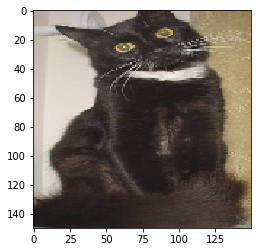

In [54]:
from keras.preprocessing import image
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
dogs_path = [os.path.join(validation_dir_dogs, item) for item in os.listdir(validation_dir_dogs)]
cats_path = [os.path.join(validation_dir_cats, item) for item in os.listdir(validation_dir_cats)]


sample_image = image.load_img(path = random.choice(dogs_path + cats_path),
                             target_size=(150,150,3))
plt.imshow(sample_image)

image_array = image.img_to_array(sample_image)
image_array = np.expand_dims(image_array, axis=0)
prediction = model.predict(image_array, batch_size=10)
print('Prediction is: ', 'Dogs' if prediction[0] > 0 else'Cats')

<Figure size 432x288 with 0 Axes>

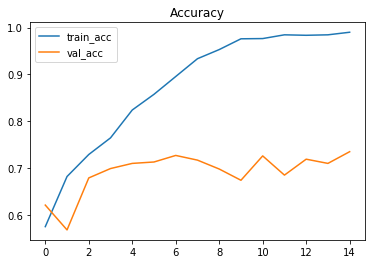

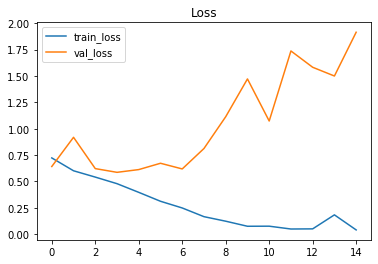

<Figure size 432x288 with 0 Axes>

In [61]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epoches = np.arange(15)

plt.plot(epoches, acc, label='train_acc')
plt.plot(epoches, val_acc, label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epoches, loss, label='train_loss')
plt.plot(epoches, val_loss, label='val_loss')
plt.title('Loss')
plt.legend()
plt.figure()

C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


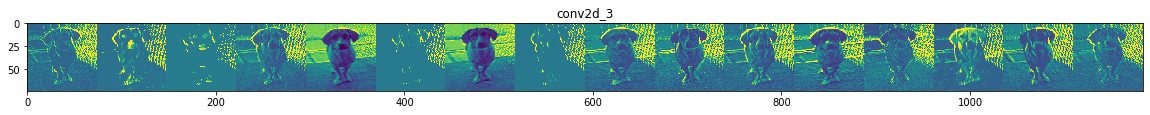

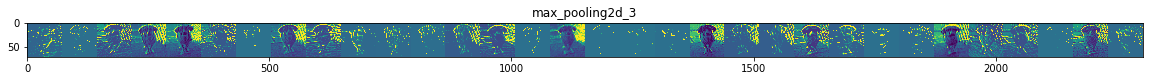

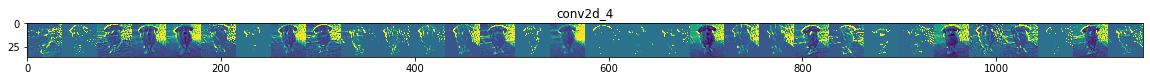

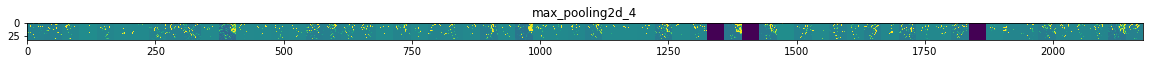

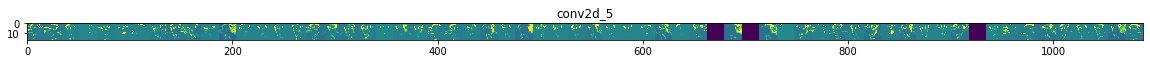

In [65]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_dir_cats, f) for f in os.listdir(train_dir_cats)]
dog_img_files = [os.path.join(train_dir_dogs, f) for f in os.listdir(train_dir_dogs)]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [66]:
successive_outputs

[<tf.Tensor 'max_pooling2d_3/Identity:0' shape=(None, 74, 74, 16) dtype=float32>,
 <tf.Tensor 'conv2d_4/Identity:0' shape=(None, 72, 72, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_4/Identity:0' shape=(None, 36, 36, 32) dtype=float32>,
 <tf.Tensor 'conv2d_5/Identity:0' shape=(None, 34, 34, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_5/Identity:0' shape=(None, 17, 17, 64) dtype=float32>,
 <tf.Tensor 'flatten_1/Identity:0' shape=(None, 18496) dtype=float32>,
 <tf.Tensor 'dense_2/Identity:0' shape=(None, 512) dtype=float32>,
 <tf.Tensor 'dense_3/Identity:0' shape=(None, 1) dtype=float32>]